<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/finalplant11recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = Path("/content/sample_data")
print(path)
for file, folder in [('ipomoeapescapre.csv', 'ipomoea'), ('xylocarpusgranatum.csv', 'xylocarpus '), ('heritieralittoralis.csv', 'heritiera'),
                     ('Acanthusilicifolius.csv', 'Acanthus'),('Rhizophoramucronata.csv', 'Rhizophora')]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

In [0]:
bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/sample_data'

In [5]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes)            

There are  5 classes:
 ['Acanthus', 'xylocarpus ', 'ipomoea', 'Rhizophora', 'heritiera']


In [7]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Acanthus


Class: xylocarpus 


Class: ipomoea


Class: Rhizophora


Class: heritiera


In [0]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

In [9]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 640 training images and 160 validation images.


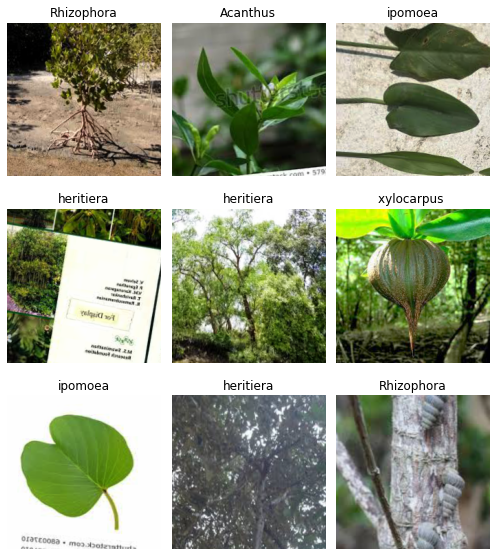

In [10]:
data.show_batch(rows=3, figsize=(7, 8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Acanthus', 'Rhizophora', 'heritiera', 'ipomoea', 'xylocarpus '],
 5,
 640,
 160)

In [12]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


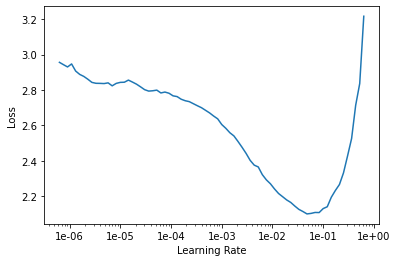

In [13]:
learn.lr_find();
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.285020,2.566760,0.543750,0.456250,03:51
1,1.787588,2.224159,0.456250,0.543750,03:50
2,1.478328,1.611285,0.431250,0.568750,03:48
3,1.247396,1.501599,0.450000,0.550000,03:53


In [16]:
interp = ClassificationInterpretation.from_learner(learn)

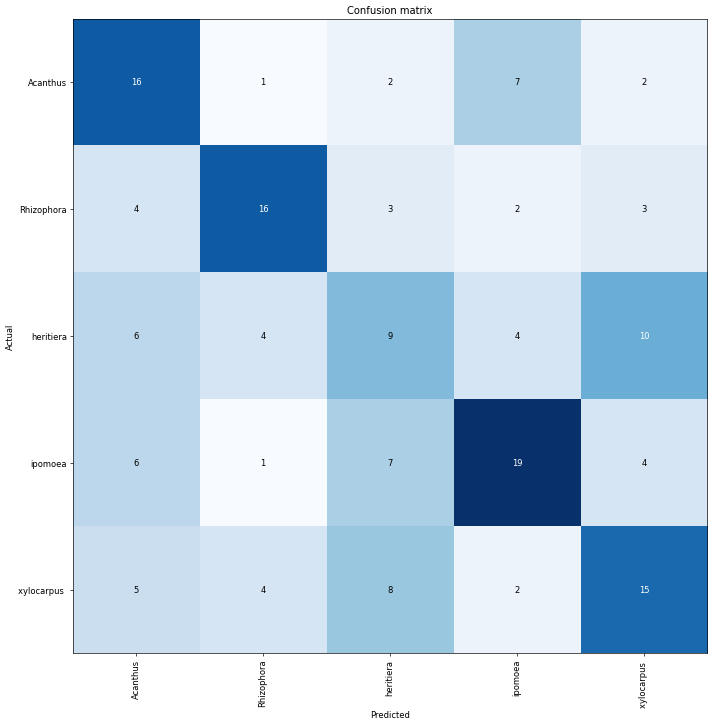

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
ClassConfusion(interp, ['Acanthus','heritiera'], figsize=(12,12))

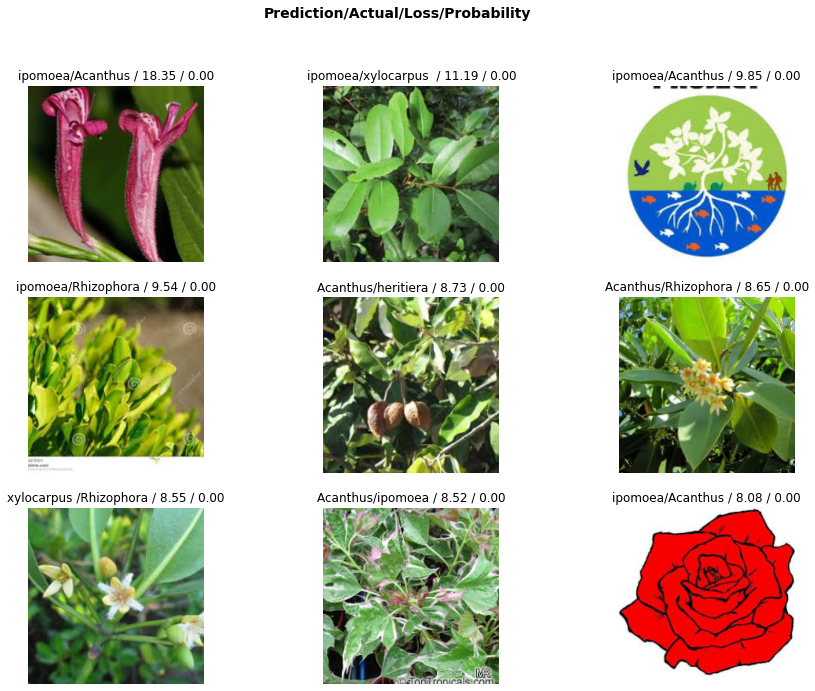

In [40]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
from fastai.widgets import *

In [0]:
learn.export()

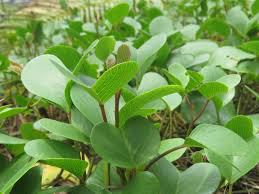

In [47]:
img = open_image('/content/sample_data/testl.jpg')
img

In [0]:
learn = load_learner(PATH)

In [49]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(3)